# Meteostat JSON API

Obtener datos de temperatura a nivel diario de las provincias de la Republica Dominicana.

In [2]:
pip install meteostat


  Using cached meteostat-1.6.5-py3-none-any.whl (31 kB)


In [3]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Monthly
pd.set_option('display.float_format', np.format_float_positional)

Dataset de provincias creado

In [4]:
provincias = pd.read_excel("Listado de provincias.xlsx", sheet_name="Provincias")
provincias.head()

,COD,DESCRIPCION,LON,LAT
0,1,DISTRITO NACIONAL,18.4855733122314,-69.931946240697
1,2,LA ALTAGRACIA,18.6275106168221,-68.4674591068167
2,3,AZUA,18.4536182121849,-70.7351759521888
3,4,BAHORUCO,18.4895235661208,-71.4180457536132
4,5,BARAHONA,18.2127826548071,-71.1025569259113


Set up the API access

In [5]:
# import requests

# url = "https://meteostat.p.rapidapi.com/point/monthly"

# querystring = {"lat":"52.5244","lon":"13.4105","start":"2017-01-01","end":"2023-12-31","alt":"43"}

# headers = {
# 	"X-RapidAPI-Key": "109cc183e3mshf79e545942401adp16a696jsn46c59a37705a",
# 	"X-RapidAPI-Host": "meteostat.p.rapidapi.com"
# }

# response = requests.get(url, headers=headers, params=querystring)

# print(response.json())

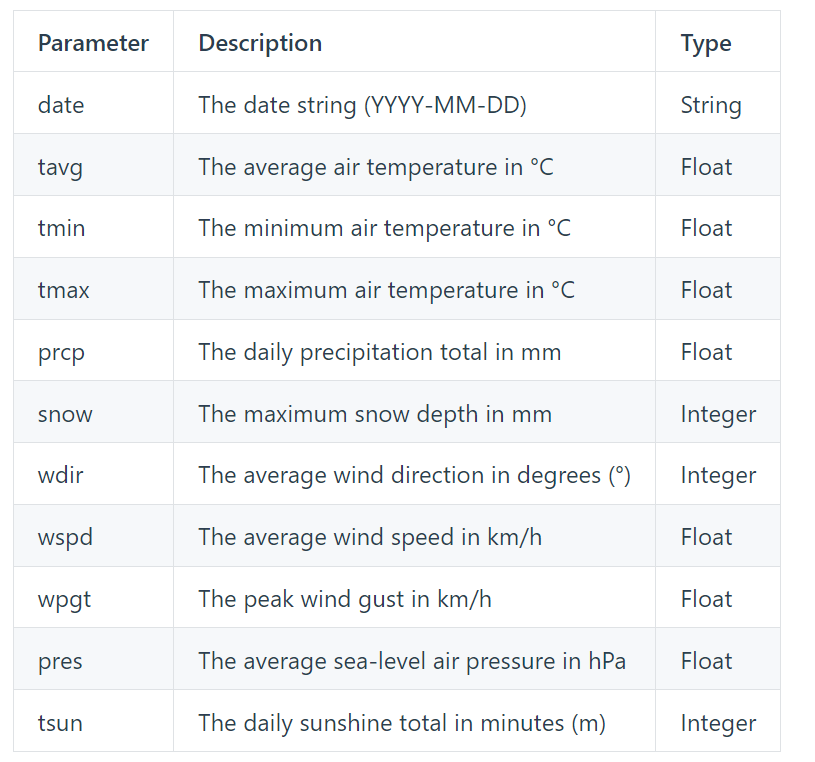

Daily data can be queried for a maximum of 10 years per request.

In [6]:
# Definir las fechas relevantes de analisis
start = datetime(2014, 7, 1)
end = datetime(2022, 12, 31)

In [11]:
data_concat = pd.DataFrame()

for index, row in provincias.iterrows():
    descripcion = row['DESCRIPCION']
    lon = row['LON']
    lat = row['LAT']
    prov_name = Point(lon, lat) # Elevation above sea level for SD set to 14 meters, which is approximately 46 feet above sea level.
    # Get daily data for the defined time range
    data_raw = Daily(prov_name, start, end)
    data_raw = data_raw.fetch()
    data_raw['DESCRIPCION'] = descripcion
    data_raw['LON'] = lon
    data_raw['LAT'] = lat
    data_raw = data_raw.reset_index()
    data_concat = pd.concat([data_concat, data_raw], axis=0)

data_concat.drop(columns="index", inplace=True)
data_concat

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,DESCRIPCION,LON,LAT
0,2014-07-01,28.3,26.,32.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DISTRITO NACIONAL,18.4855733122314,-69.931946240697
1,2014-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DISTRITO NACIONAL,18.4855733122314,-69.931946240697
2,2014-07-03,27.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DISTRITO NACIONAL,18.4855733122314,-69.931946240697
3,2014-07-04,26.9,25.3,32.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DISTRITO NACIONAL,18.4855733122314,-69.931946240697
4,2014-07-05,28.9,25.2,33.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DISTRITO NACIONAL,18.4855733122314,-69.931946240697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3101,2022-12-27,23.3,20.8,27.4,4.1,NaN,44.,8.2,NaN,1017.8,NaN,SANTO DOMINGO,18.5571945637294,-69.8981304594399
3102,2022-12-28,23.4,19.3,28.6,0.2,NaN,29.,7.7,NaN,1018.4,NaN,SANTO DOMINGO,18.5571945637294,-69.8981304594399
3103,2022-12-29,24.,20.6,28.6,0.3,NaN,22.,10.8,NaN,1019.2,NaN,SANTO DOMINGO,18.5571945637294,-69.8981304594399
3104,2022-12-30,24.2,21.3,29.,1.2,NaN,12.,13.,NaN,1018.2,NaN,SANTO DOMINGO,18.5571945637294,-69.8981304594399


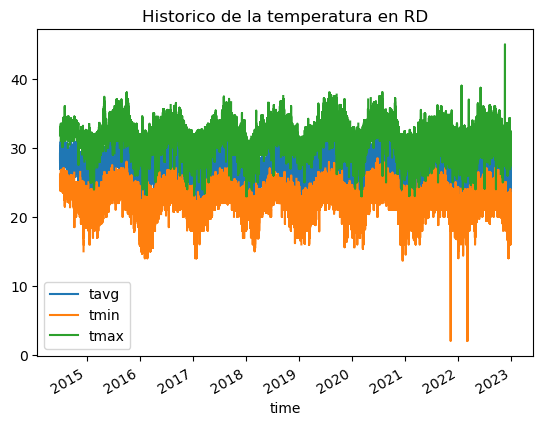

In [15]:
# Plot line chart including average, minimum and maximum temperature
data_concat.plot(x='time', y=['tavg', 'tmin', 'tmax'])
plt.title("Historico de la temperatura en RD")
plt.show()

In [16]:
data_concat_save_0 = data_concat.copy()

In [14]:
data_concat.to_excel("MeteostatData_test2.xlsx", index=False, sheet_name="ProvinciasHistorico")